### Clean User input to list

In [91]:
def user_points(prompt):  
    #Loop through the prompt to check if user input is a float or can be converted to a float  
    while True:
        try:
            user_points = (input(prompt))
            user_points = [float(i) for i in user_points.split()]

            for user in user_points:
                if user < 0: 
                    raise ValueError("value must be greater than 0")
            break
        except ValueError as err:
            print(err)

    return [user_points]
user_points("Input your coordinates seperated by a space")

could not convert string to float: 'we'
could not convert string to float: 'we'
value must be greater than 0
could not convert string to float: 'sa'
could not convert string to float: 'sa'


[[12.0, 32.0]]

### Sort training data to Pichu and Pikachu documents

In [62]:
def sort_points_to_documents():
    
    with open("../Data/datapoints.txt", "r") as f_points:
        points = [point.strip("\n") for point in f_points.readlines()]

    points.pop(0)

    datapoints = [data.split(",") for data in points]
    pichu_list = []
    pika_list = []

    for datapoint in datapoints:
        datapoint = [i.strip() for i in datapoint]
        if datapoint[2] == "0":
            pichu_list.append(datapoint)
        if datapoint[2] == "1":
            pika_list.append(datapoint)

    with open("../Data/pichu.txt", "w") as f_pichu:
        for item in pichu_list:
            f_pichu.write(f"{item}\n")
    with open("../Data/pikachu.txt", "w") as f_pika:
        for item in pika_list:
            f_pika.write(f"{item}\n")


sort_points_to_documents()

### Clean up testpoints to usable data

In [308]:
def test_points_cleanup():
    with open("../Data/testpoints.txt", "r") as f_test_points:
        test_points_to_check =  f_test_points.readlines()

    #Remove first item from list with is just a description
    test_points_to_check = test_points_to_check[1:]
    
    #clean up list to remove brackets and commas
    test_points_to_check = [line[4:-2] for line in test_points_to_check]

    #split item in list using comma
    test_points_to_check = [line.split(",") for line in test_points_to_check]

    #Convert each item list in test_points_to_check list to float
    test_points_to_check = [[float(a) for a in b] for b in test_points_to_check]
    return test_points_to_check

### Create algorithm to return a pichu or pikachu

In [64]:
from turtle import color
import matplotlib.pyplot as plt
import numpy as np
import ast
import math

def pichu_or_pikachu(data = []):
    
    pichu_height_list = []
    pichu_width_list = []
    pikachu_height_list = []
    pikachu_width_list = []

    result = ""

    with open("../Data/pichu.txt", "r") as f_pichu_list:
        pichu_data_list = [ast.literal_eval(pichu) for pichu in f_pichu_list.readlines()]
    
    #create a seperate pichu/pikachu height and width list
    for item in pichu_data_list:
        pichu_height_list.append(float(item[0]))
        pichu_width_list.append(float(item[1]))

    with open("../Data/pikachu.txt", "r") as f_pikachu_list:
        pikachu_data_list = [ast.literal_eval(pika) for pika in f_pikachu_list.readlines()]

    for item in pikachu_data_list:
        pikachu_height_list.append(float(item[0]))
        pikachu_width_list.append(float(item[1]))

    diffrence = []
    pika_points_distance_list = []
    pichu_points_distance_list = []
    pichu_sample_list = []
    pika_sample_list = []

    #Calculate the closest distance to each point in the pikachu/pichu lists from the sample list we have
    #use numpy to calculate the square root of the minimum distance between points
    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pikachu_data_list)
        pika_points_distance_list.append(np.sqrt(min_distance))

    
    for sample in data:
        min_distance = min((sample[0] - float(point[0]))**2 +(sample[1] - float(point[1]))**2 for point in pichu_data_list)
        pichu_points_distance_list.append(np.sqrt(min_distance))


    #For item in the pichu distance list zip to thesame item in the pika points list so that they are tied to thesame index
    a = [x1 - x2 for (x1, x2) in zip(pichu_points_distance_list, pika_points_distance_list)]
    zip_obj = zip(pichu_points_distance_list, pika_points_distance_list)

    #compare the distance of the sample point to the respective  pichu or pikachu points and take the min for either pichu or pikachu
    for i in range(len(data)):
        for pichu, pika in zip_obj:
            if pichu - pika < 0 :
                pichu_sample_list.append(data[i])
                result = f"classified as Pichu"
                break
            else:
                pika_sample_list.append(data[i])
                result = f"classified as Pikachu"
                break
        diffrence.append([data[i], pichu - pika, result])

    print(*diffrence, sep="\n")

    
    pika_sample_height = [i[0] for i in pika_sample_list]
    pika_sample_width = [i[1] for i in pika_sample_list]
    pichu_sample_height = [i[0] for i in pichu_sample_list]
    pichu_sample_width = [i[1] for i in pichu_sample_list]


    plt.plot(pichu_sample_height, pichu_sample_width, "o", label="Pichu Sample")
    plt.plot(pichu_height_list, pichu_width_list, "1")
    plt.plot(pikachu_height_list, pikachu_width_list, "2")
    plt.plot(pika_sample_height, pika_sample_width, "*")
    plt.title(f"You entry is a: {result}")
    plt.xlabel("Width")
    plt.ylabel("Height")   
    plt.legend(["Pichu Test", "Pichu Actual", "Pikachu Actual", "Pika Test"])
 
    

[[32.0, 12.0], -0.6093767825405969, 'classified as Pichu']


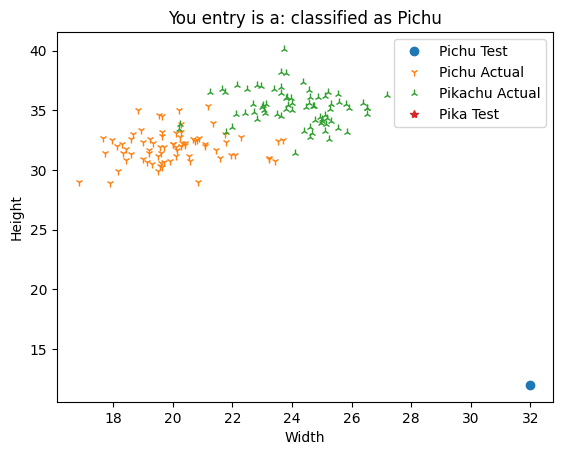

In [65]:
#Take user input and add to graph

#sample_list = test_points_cleanup()
user_input = user_points("Input points")
pichu_or_pikachu(user_input)


### Votes for a point with little margin to pichu or pikachu

In [69]:
from operator import itemgetter
def election_day():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]

    user_input = user_points("Input your coordinates")
    distance_points_list = []
    pichu_votes = 0
    pikachu_votes = 0
    for item in points:
        distance = math.sqrt(((user_input[0][0]) - float(item[0]))**2 + ((user_input[0][1]) - float(item[1]))**2)
        distance_points_list.append([distance, item[2]])

    distance_points_list = sorted(distance_points_list, key=itemgetter(0))
    distance_points_list = distance_points_list[:10]

    winner = ""
    for item in distance_points_list:
        if float(item[1]) == 1:
            pikachu_votes += 1
            winner = f"Points with height: {user_input[0][0]} and width: {user_input[0][1]} is classified as a pikachu with {pikachu_votes} votes"
        else:
            pichu_votes += 1
            winner = f"Points with height: {user_input[0][0]} and width: {user_input[0][1]} is classified as {pichu_votes} votes"
    return winner

election_day()

'Points with height: 23.0 and width: 43.0 is classified as a pikachu with 10 votes'

#### VG part

In [339]:
from re import I
import numpy as np
import random

def random_data():
    with open("../Data/datapoints.txt", "r") as f_data:
        points = [point.strip("\n") for point in f_data.readlines()]
        points.pop(0)
        points = [data.split(",") for data in points]


    #filter list to sort pichu or pikachu points using lambda function by cheching if the item in every sublist is 0 or 1
    pichu_sorted_list = list(filter(lambda x: float(x[-1]) == 0, points))
    pikachu_sorted_list = list(filter(lambda x: float(x[-1]) == 1, points))

    #shuffle the lists inorder to always pick different items for every sublist as below
    random.shuffle(pichu_sorted_list)
    random.shuffle(pikachu_sorted_list)


    pichu_50 = pichu_sorted_list[:50]
    pichu_25 = pichu_sorted_list[-25:]

    pikachu_50 = pikachu_sorted_list[:50]
    pikachu_25 = pikachu_sorted_list[-25:]

    pichu_50.extend(pikachu_50)
    pichu_25.extend(pikachu_25)
    
    #convert every item in the extended pichu list to a float
    test_data = [[float(a) for a in b] for b in pichu_25]

    return ([pichu_50, pikachu_50, test_data])


In [355]:
import math
import numpy as np

def closest():
    data = random_data()
    pichu_50 = data[0]
    pikachu_50 = data[1]
    test_data = data[2]
    pichu_distance = []
    pikachu_distance = []
    min_dist = []
    difference = []
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for test in test_data:
        min_distance = min((float(test[0]) - float(point[0]))**2 + (float(test[1]) - float(point[1]))**2 for point in pichu_50)
        pichu_distance.append(np.sqrt(min_distance))
    
    for test in test_data:
        min_distance = min((float(test[0]) - float(point[0]))**2 + (float(test[1]) - float(point[1]))**2 for point in pikachu_50)
        pikachu_distance.append(np.sqrt(min_distance))

    a = [x1 - x2 for (x1, x2) in zip(pichu_distance, pikachu_distance)]
    zip_object = zip(pichu_distance, pikachu_distance)

    for i in range(len(test_data)):
        for pichu, pika in zip_object:
            if pichu - pika < 0:
                result = f"pichu"
                if test_data[2] == 0.0:
                    fp+=0
                else:
                    fn+=0
                break

            else:
                result = f"pikachu"
                if test_data[2] == 1.0:
                    tp+=0
                else:
                    tn+=0
                break
        difference.append([test_data[i][2], result])
    
    for d in difference:
        if (str(d[0]) + d[1] == "0.0pichu"):
            tn +=1
        elif (str(d[0]) + d[1] == "0.0pikachu"):
            fp += 1
        elif (str(d[0]) + d[1] == "1.0pikachu"):
            tp +=1
        elif (str(d[0]) + d[1] == "1.0pichu"):
            fn +=1

    return ([tp, tn, fp, fn])

closest()


[22, 25, 0, 3]

[25, 23, 2, 0]
[24, 24, 1, 1]
[23, 18, 7, 2]
[25, 22, 3, 0]
[24, 23, 2, 1]
[24, 21, 4, 1]
[25, 24, 1, 0]
[24, 24, 1, 1]
[24, 21, 4, 1]
[24, 23, 2, 1]
[24, 23, 2, 1]


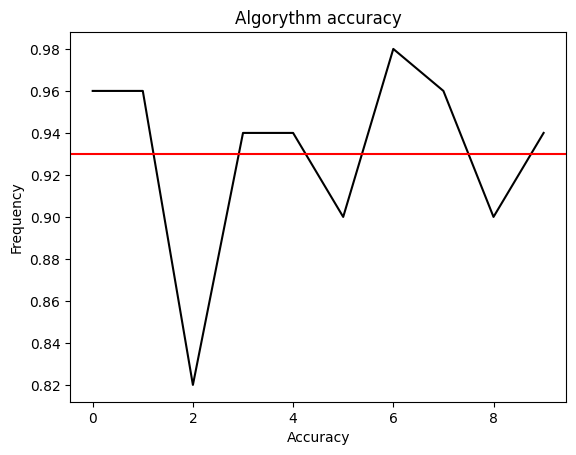

In [361]:
from statistics import mean
from turtle import width
import matplotlib.pyplot as plt
import numpy as np

def accuracy():
    accuracy_list = []
    accuracy_points = []
    
    for i in range(10):
        #accuracy_cal =< (tp + tn )/(tp + tn + fp + fn)
        get_accuracy = closest()
        accuracy_list.append(get_accuracy)
        for i in range(len(accuracy_list)):
            #calculate accuracy by taking the first two items in our list and dividing the sum of the items in the list
             accuracy_cal = ( sum(accuracy_list[i][:2]))/(sum(accuracy_list[i]))
        accuracy_points.append(accuracy_cal)
    
    mean_value = np.mean(accuracy_points)
    
    plt.plot( range(10), accuracy_points, color="black")
    plt.axhline(mean_value, color="red")
    plt.ylabel("Frequency")
    plt.xlabel("Accuracy")
    plt.title("Algorythm accuracy")
    plt.show()
    
accuracy()